# Energetski bilans BiH - 2019.

Energetski bilans BiH je u TJ preuzet sa stranice Međunarodne agencije za energiju https://www.iea.org/data-and-statistics/data-tables?country=BOSNIAHERZ&energy=Balances&year=2019. Naknadno će se prevesti na bosanski.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file=pd.read_excel(r"FILES\BALANCE\bilans2019.xlsx",sheet_name="TJ_2019", header=0,usecols="A:L")

In [3]:
file=file.set_index("TJ")

In [4]:
file

,Coal,Crude oil,Oil products,Natural gas,Nuclear,Hidro,"Wind, solar,etc",Biofuels and waste,Electricity,Heat,Total
TJ,,,,,,,,,,,
Production,142461.0,NaN,NaN,NaN,0.0,21964.0,1022.0,60845.0,NaN,NaN,226292.0
Imports,47059.0,NaN,66130.0,7871.0,NaN,NaN,NaN,94.0,10170.0,NaN,131324.0
Exports,-14714.0,NaN,1717.0,NaN,NaN,NaN,NaN,-8736.0,-23634.0,NaN,-45367.0
International marine bunkers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
International aviation bunkers,NaN,NaN,-388.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-388.0
Stock changes,-11183.0,3259.0,1472.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6452.0
TES,163623.0,3259.0,68931.0,7871.0,0.0,21964.0,1022.0,52203.0,-13464.0,0.0,305409.0
Transfers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Statistical differences,-4.0,280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276.0


In [5]:
file.loc["TES","Total"]

305409.0

## TES

Bosna i Hercegovina je u 2019. koristila ukupno 305409 TJ energije.

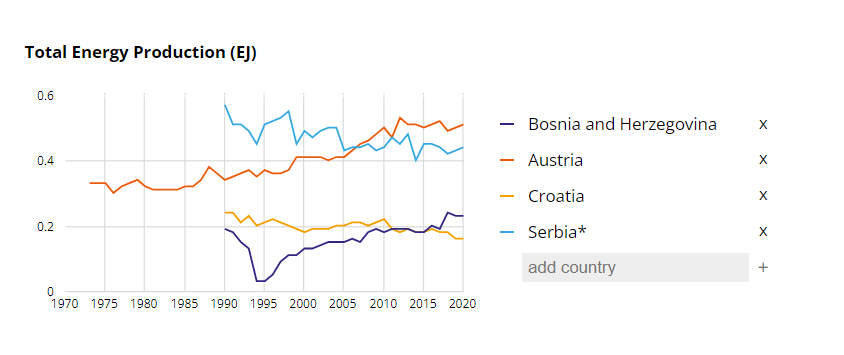

Što se tiče diverziteta izvora energije u TESu, najvažniji primarni izvori energije su ugalj sa 53%, naftni derivati sa 22,6%, te hidropotencijal sa 7,2%. Udio OIE je 24,6%.

Kada je riječ o uvozu energetskih proizvoda, to su najvećim dijelom naftni derivati, ugalj, prirodni gas. Od sekundarnih izvora, može se primijetiti da BiH izvozi skoro dvostruko više električne energije nego što je uvozi. Male količine naftnih derivata se koriste u međunarodnom avionskom saobraćaju, dok energetske rezerve čine ugalj, sirova nafta, naftni derivati, dok ne postoje rezerve prirodnog gasa.
Statistička razlika je prisutna u kategorijama uglja, a nešto veća je u koloni koja se odnosi na sirovu naftu, konverzije jedinica u prvom slučaju, dok veća statistička razlika u drugom slučaju može ukazivati na nepouzdanost prikupljanja podataka.


In [6]:
share_tes=(file.iloc[6,:8]/file.loc["TES","Total"])*100

In [7]:
share_tes

Coal                  53.575042
Crude oil              1.067094
Oil products          22.570062
Natural gas            2.577200
Nuclear                0.000000
Hidro                  7.191668
Wind, solar,etc        0.334633
Biofuels and waste    17.092817
Name: TES, dtype: float64

In [8]:
oie_share=share_tes[5:8].sum()
print("Udio OIE u TES:",oie_share,"%")

Udio OIE u TES: 24.619117314813906 %


Biomasa čini 116% ukupne primarne energije biomase, što znači da od ukupno proizvedene jedan dio ide na izvoz,dok je uvoz veoma mali. Proizvedena količina uglja pokriva 87% ukupne količine, s tim što se ugalj i uvozi i izvozi, dok se država u slučaju nafte i prirodnog gasa u potpunosti oslanja na uvoz.  

In [9]:
production_tes_ratio=(file.iloc[0,:8]/file.iloc[6,:8])*100

Text(0.5, 0, 'Resurs')

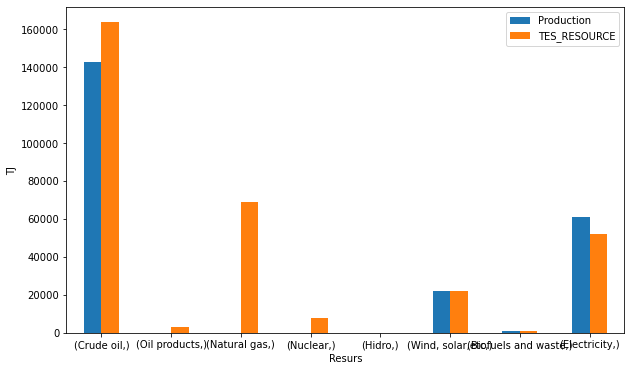

In [10]:
production = file.iloc[0,:8].values
TES_RESOURCE = file.iloc[6,:8].values
index = [file.columns[1:9]]
df = pd.DataFrame({'Production': production,
                   'TES_RESOURCE': TES_RESOURCE}, index=index)
ax = df.plot.bar(rot=0, figsize=(10,6))
ax.set_ylabel("TJ")
ax.set_xlabel("Resurs")

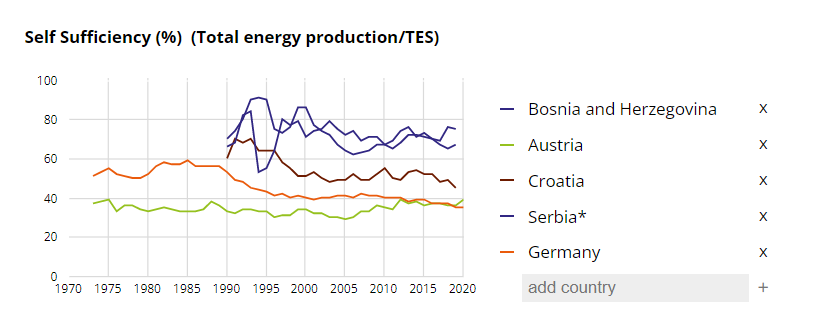

## Transformacija

In [11]:
file_tr=file.transpose()

Udio TES u potrošnji  elektrana za konverziju u električnu energiju :

In [13]:
total_resour=file.loc["Electricity plants",['Coal', 'Crude oil', 'Oil products', 'Natural gas', 'Nuclear', 'Hidro',
       'Wind, solar,etc', 'Biofuels and waste']].sum()

resources_el_plants=(file_tr.loc[['Coal', 'Crude oil', 'Oil products', 'Natural gas', 'Nuclear', 'Hidro',
       'Wind, solar,etc', 'Biofuels and waste'],"Electricity plants"]/total_resour)*100



print(resources_el_plants,"%")

Coal                  83.883114
Crude oil                   NaN
Oil products           0.341313
Natural gas            0.163884
Nuclear               -0.000000
Hidro                 14.874209
Wind, solar,etc        0.692107
Biofuels and waste     0.045373
Name: Electricity plants, dtype: float64 %


Prosječna efikasnost elektrana u kojima se proizvodi električna energija je:

In [14]:
electrictiy_plants_eff=(file.loc["Electricity plants","Electricity"]/abs(file.loc["Electricity plants",['Coal', 'Crude oil', 'Oil products', 'Natural gas', 'Nuclear', 'Hidro',
       'Wind, solar,etc', 'Biofuels and waste']].sum()))*100
print(electrictiy_plants_eff,"%")

41.96187315883926 %


Efikasnost CHP elektrana - po podacima iz energetskog bilansa koriste samo ugalj 

In [15]:
CHP_plants_eff_el=(file.loc["CHP plants","Electricity"]/abs(file.loc["CHP plants",'Coal'])*100)
print(CHP_plants_eff_el,"% electrical efficiency")

CHP_plants_eff_term=(file.loc["CHP plants","Heat"]/abs(file.loc["CHP plants",'Coal'])*100)
print(CHP_plants_eff_term,"% thermal efficiency")

total_CHP_eff=(file.loc["CHP plants","Electricity"]+file.loc["CHP plants","Heat"])/abs(file.loc["CHP plants",'Coal'])*100
print(total_CHP_eff,"% total efficiency")

22.281167108753316 % electrical efficiency
49.74948423224285 % thermal efficiency
72.03065134099617 % total efficiency


Udio OIE u električnoj energiji:

In [16]:
RES=(abs(file.loc["Electricity plants",["Hidro",
       'Wind, solar,etc', 'Biofuels and waste']].sum())/(file.loc["Electricity plants","Electricity"]+file.loc["CHP plants","Electricity"]))*100
print(RES,"%")     

36.756006951641446 %


Udio hidropotencijala u električnoj energiji:

In [20]:
hydro=(abs(file.loc["Electricity plants","Hidro"])/(file.loc["Electricity plants","Electricity"]+file.loc["CHP plants","Electricity"]))*100
print(hydro,"%")    

35.01969100272645 %


In [ ]:
Udio CHP i toplana u proizvedenoj toploti

In [23]:
heat_share=(file_tr.loc["Heat",["Heat plants","CHP plants"]]/file_tr.loc["Heat",["Heat plants","CHP plants"]].sum())*100
print(heat_share,"%")  

TJ
Heat plants    69.700233
CHP plants     30.299767
Name: Heat, dtype: float64 %


Konverzija energije goriva u toplotu u toplanama:

In [21]:
heat_plants_conv=(file.loc["Heat plants","Heat"]/abs(file.loc["Heat plants",['Coal', 'Natural gas','Biofuels and waste']].sum()))*100
print(heat_plants_conv,"%")    

71.39179996322854 %


Udio goriva u toplanama:

In [103]:
(file.loc["Heat plants",['Coal', 'Natural gas','Biofuels and waste']]/file.loc["Heat plants",['Coal', 'Natural gas','Biofuels and waste']].sum())*100

Coal                  43.188086
Natural gas           32.009561
Biofuels and waste    24.802353
Name: Heat plants, dtype: float64

Vlastita upotreba:

In [87]:
energy_own_use=((file.loc["Energy industry own use",['Coal', 'Oil products',
       "Electricity","Heat"]])/file.loc["Energy industry own use","Total"])*100
energy_own_use 

Coal            48.155064
Oil products    13.183448
Electricity     38.504631
Heat             0.156857
Name: Energy industry own use, dtype: float64

Gubici:

In [97]:
losses_el=(abs(file.loc["Losses","Electricity"])/(file.loc["Electricity plants","Electricity"]+file.loc["CHP plants","Electricity",]))*100
print(losses_el,"%")  

7.21471962244296 %


In [98]:
losses_heat=(abs(file.loc["Losses","Heat"])/(file.loc["Heat plants","Heat"]+file.loc["CHP plants","Heat",]))*100
print(losses_heat,"%")  

7.5749416621791426 %


## TFC

Finalna potrošnja energije se  ogleda kroz četiri glavna sektora: industrija, saobraćaj, stambeni sektor i sektor uslužnih i javnih djelatnosti. Potrošnja resursa u neeenergetske svrhe čini 2,1% ukupne potrošnje. 

U svim sektorima izuzev saobraćaja, značajna je potrošnja električne energije.Sektor industrije se značajnim dijelom oslanja na ugalj, naftne derivate i prirodni gas, dok je u stambenom sektoru prisutan značajn udio biogoriva (39%) za proizvodnju toplote, s obzirom na nizak nivo domaćinstava koji se sanbdijevaju toplotom putem sistema daljinskog grijanja. Drugi značajn izvor energije za domaćinstva je električna energija (35%) , koja se osim za uobičajene dnevne potrebe koristi jednim dijelom i za snabdijevanje toplotom.


In [41]:
production_tes_ratio

Coal                   87.066610
Crude oil                    NaN
Oil products                 NaN
Natural gas                  NaN
Nuclear                      NaN
Hidro                 100.000000
Wind, solar,etc       100.000000
Biofuels and waste    116.554604
dtype: float64

In [42]:
# procenat uglja koji se uvozi u odnosu na proizvedenu
(file.iloc[1,0]/file.iloc[0,0])*100

33.03290023234429

Što se tiče potrošnje energije, najveći potrošač finalne energije je stambeni sektor, pri čemu najveći udio u potrošnji imaju biogoriva sa 64%,električna energija sa 24% i toplotna energija. Ovdje je važno napomenuti da se biogoriva u najvećoj mjeri koriste za snabdjevanje toplotom zbog malog procenta stanovnika priključenih na sisteme daljinskog grijanja. Nakon toga, najveću potrošnju finalne energije bilježi sektor transporta koji se uglavnom oslanja na naftne derivate. Sektor industrije troši više resursa, ugalj, naftne derivate, prirodni gas i električnu energiju koja je najdominantnija - 43%. 

Sektor uslužnih djelatnosti najviše troši električnu energiju (52%), dok se potrošnja ostalih resursa može uglavnom pripisati energentima za grijanje prostora.

<AxesSubplot:ylabel='TJ'>

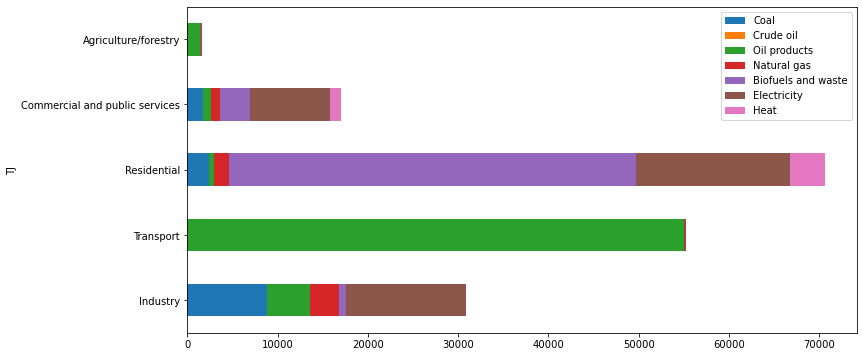

In [43]:
file[["Coal","Crude oil","Oil products","Natural gas","Biofuels and waste","Electricity","Heat"]][20:25].plot(kind="barh",stacked=True,figsize=(12,6))


<AxesSubplot:ylabel='Commercial and public services'>

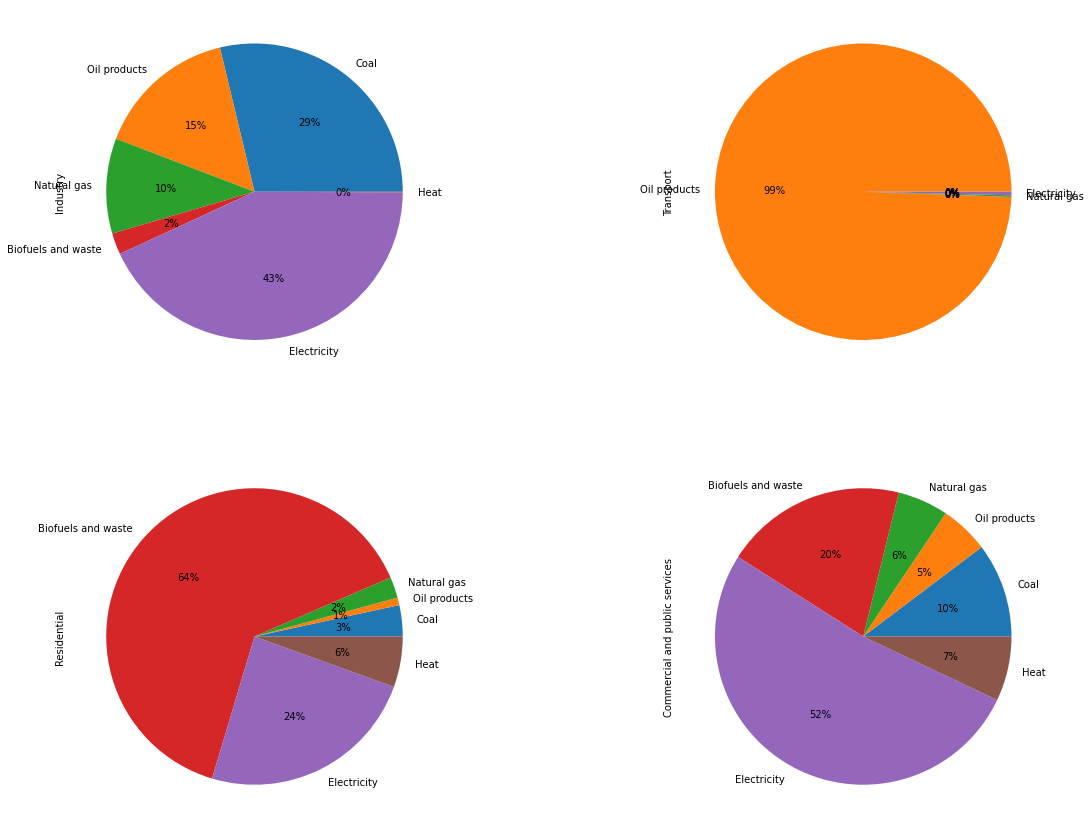

In [44]:
fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(20,15))

industry_fuel=(file.loc["Industry",["Coal","Oil products","Natural gas","Biofuels and waste","Electricity","Heat"]]/file.loc["Industry","Total"])*100
industry_fuel.plot(kind="pie",autopct='%1.0f%%',ax=ax[0,0])

transport_fuel=(file.loc["Transport",["Coal","Oil products","Natural gas","Biofuels and waste","Electricity","Heat"]]/file.loc["Industry","Total"])*100
transport_fuel.plot(kind="pie",autopct='%1.0f%%',ax=ax[0,1])


residential_fuel=(file.loc["Residential",["Coal","Oil products","Natural gas","Biofuels and waste","Electricity","Heat"]]/file.loc["Industry","Total"])*100
residential_fuel.plot(kind="pie",autopct='%1.0f%%',ax=ax[1,0])

commercial_fuel=(file.loc['Commercial and public services',["Coal","Oil products","Natural gas","Biofuels and waste","Electricity","Heat"]]/file.loc["Industry","Total"])*100
commercial_fuel.plot(kind="pie",autopct='%1.0f%%',ax=ax[1,1])


U finalnoj potrošnji, najveće je učešće naftnih derivata, koji se najviše koriste u saobraćaju (90%) i u industriji sa 8% učešća. Nakon toga slijede biogoriva, gdje u finalnoj potrošnji najviše učestvuje stambeni sektor (92%), te električna energija u kojem stambeni sektor učestvuje sa 43%, dok industrija zauzima 34%. Ostalo čine sektor uslužnih djelatnosti i drugi. Najmanja potrošnja se odnosi na gas, radi cijene. Što se tiče uglja, tu je svakako naveći potrošač industrija sa 68%.

<AxesSubplot:>

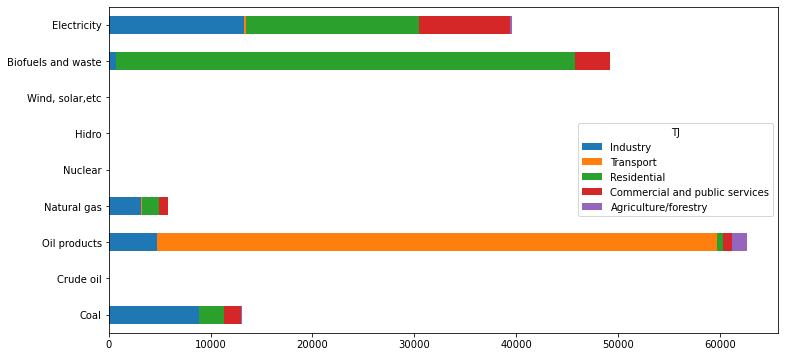

In [45]:
file_tr=file.transpose()
file_tr[['Industry', 'Transport', 'Residential',
       'Commercial and public services', 'Agriculture/forestry']][:9].plot(kind="barh",stacked=True,figsize=(12,6))

<AxesSubplot:ylabel='Heat'>

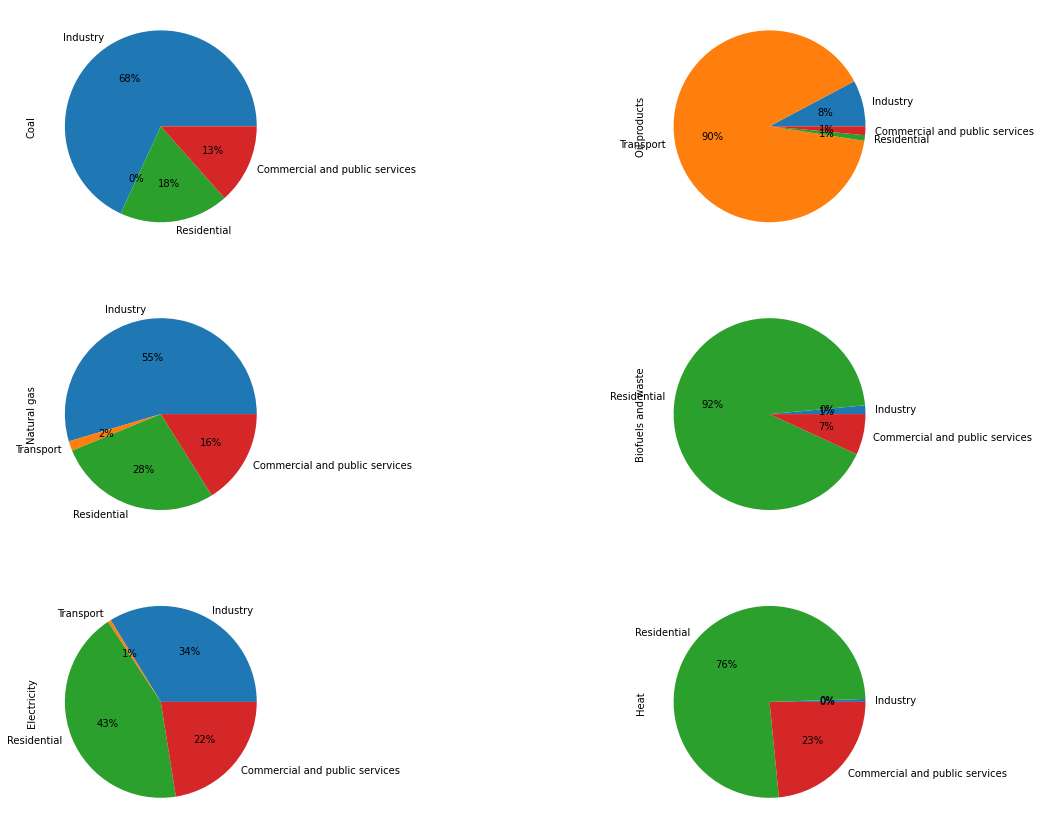

In [46]:
fig,ax=plt.subplots(ncols=2,nrows=3,figsize=(20,15))


coal_sector=(file_tr.loc["Coal",['Industry', 'Transport', 'Residential',
       'Commercial and public services']]/file_tr.loc["Coal","Total final consumption"])*100
coal_sector.plot(kind="pie",autopct='%1.0f%%',ax=ax[0,0])

oil_sector=(file_tr.loc["Oil products",['Industry', 'Transport', 'Residential',
       'Commercial and public services']]/file_tr.loc["Oil products","Total final consumption"])*100
oil_sector.plot(kind="pie",autopct='%1.0f%%',ax=ax[0,1])


gas_sector=(file_tr.loc["Natural gas",['Industry', 'Transport', 'Residential',
       'Commercial and public services']]/file_tr.loc["Natural gas","Total final consumption"])*100
gas_sector.plot(kind="pie",autopct='%1.0f%%',ax=ax[1,0])

biofuels_sector=(file_tr.loc['Biofuels and waste',['Industry', 'Transport', 'Residential',
       'Commercial and public services']]/file_tr.loc['Biofuels and waste',"Total final consumption"])*100
biofuels_sector.plot(kind="pie",autopct='%1.0f%%',ax=ax[1,1])

electricity_sector=(file_tr.loc["Electricity",['Industry', 'Transport', 'Residential',
       'Commercial and public services']]/file_tr.loc["Electricity","Total final consumption"])*100
electricity_sector.plot(kind="pie",autopct='%1.0f%%',ax=ax[2,0])

heat_sector=(file_tr.loc["Heat",['Industry', 'Transport', 'Residential',
       'Commercial and public services']]/file_tr.loc["Heat","Total final consumption"])*100
heat_sector.plot(kind="pie",autopct='%1.0f%%',ax=ax[2,1])


Potrošnja naftnih derivata iznosi preko 60 000 TJ.

## Ostali indikatori

Prema zadnjem popisu stanovništva, BiH ima 3 531 159 stanovnika. Na osnovu ovoga se može izračunati indikator TPES/CAPITA. Ovaj indikator je uvjetovan smanjenjem populacije sa jedne strane, te velikim udjelom fosilnih goriva u ukupno dostupnoj primanojr energiji.

In [47]:
TPES_CAPITA=file.loc["TES","Total"]/3531159
print("TPES/CAPITA:",TPES_CAPITA,"TJ/st.") #86GJ/st.

TPES/CAPITA: 0.08648973325755085 TJ/st.


http://energyatlas.iea.org/#!/tellmap/-297203538/0

In [48]:
TPES_GDP=file.loc["TES","Total"]/(36527050*0.58) #$
print("TPES/GDP:",TPES_GDP,"TJ/$") #14,4GJ/GDP

TPES/GDP: 0.014415816261628309 TJ/$


In [49]:
ELECT_CONSUM_CAPITA=file.loc["Total final consumption","Electricity"]/3531159
print("Electricity per capita:",ELECT_CONSUM_CAPITA,"TJ/st.") #11,2GJ/st

Electricity per capita: 0.011207368458911083 TJ/st.


In [73]:
comparison1=pd.read_excel(r"FILES\BALANCE\indicators.xlsx",sheet_name="CO2 intensity of energy mix",nrows=6)
comparison2=pd.read_excel(r"FILES\BALANCE\indicators.xlsx",sheet_name="El consumption per capita",nrows=6)
comparison3=pd.read_excel(r"FILES\BALANCE\indicators.xlsx",sheet_name="Total CO2 EMISSIONS",nrows=6)
comparison4=pd.read_excel(r"FILES\BALANCE\indicators.xlsx",sheet_name="TES per GDP ",nrows=5)
comparison5=pd.read_excel(r"FILES\BALANCE\indicators.xlsx",sheet_name="CO2 Emissions per capita",nrows=5)

Text(0, 0.5, '$t_{CO2}/capita$')

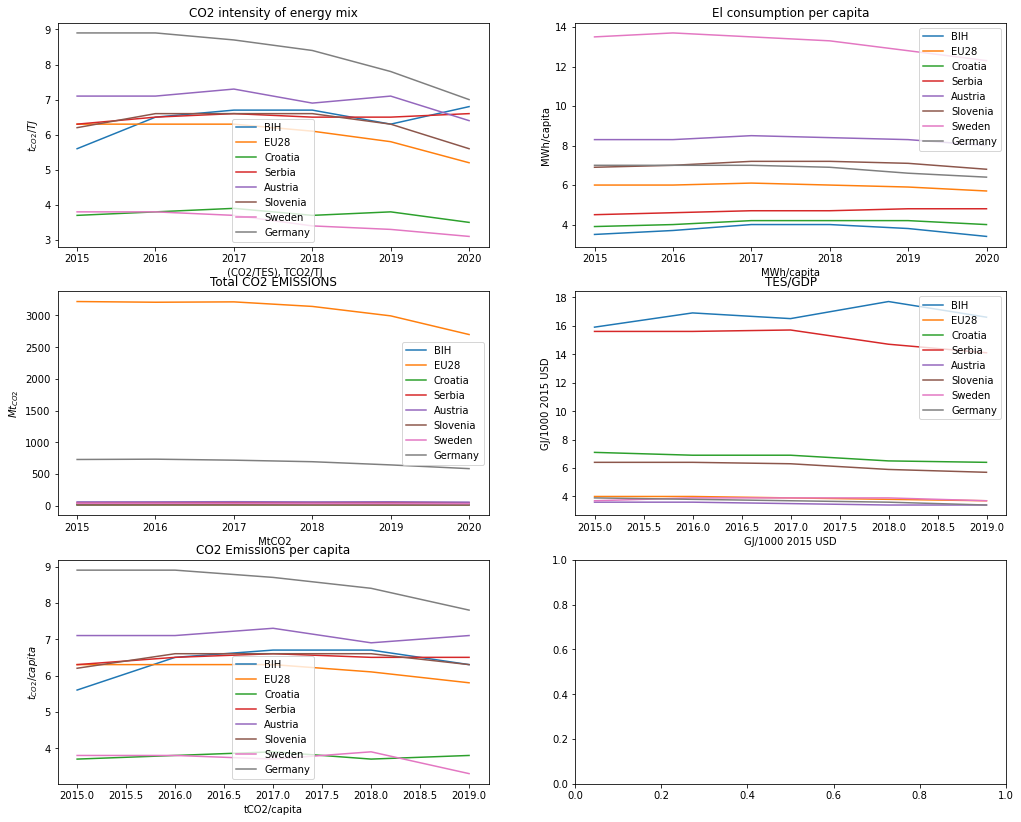

In [76]:
fig,ax=plt.subplots(ncols=2,nrows=3,figsize=(17,14))

comparison1.set_index(' (CO2/TES), TCO2/TJ\n').plot(ax=ax[0,0])
ax[0,0].set_title("CO2 intensity of energy mix")
ax[0,0].set_ylabel("$t_{CO2}/TJ$")

comparison2.set_index("MWh/capita").plot(ax=ax[0,1])
ax[0,1].set_title("El consumption per capita")
ax[0,1].set_ylabel("MWh/capita")

comparison3.set_index(' MtCO2').plot(ax=ax[1,0])
ax[1,0].set_title("Total CO2 EMISSIONS")
ax[1,0].set_ylabel("$Mt_{CO2}$")

comparison4.set_index('GJ/1000 2015 USD').plot(ax=ax[1,1])
ax[1,1].set_title("TES/GDP")
ax[1,1].set_ylabel('GJ/1000 2015 USD')

comparison5.set_index('tCO2/capita').plot(ax=ax[2,0])
ax[2,0].set_title("CO2 Emissions per capita")
ax[2,0].set_ylabel('$t_{CO2}/capita$')